In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')  
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicated rows:", df.duplicated().sum())


Shape: (768, 9)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Duplicated rows: 0


In [3]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

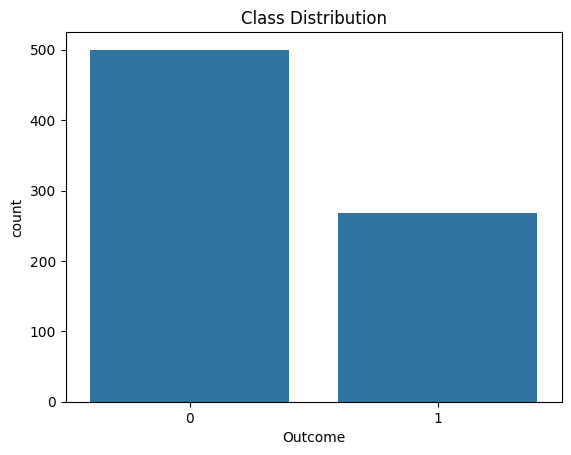

In [5]:
sns.countplot(data=df, x='Outcome')
plt.title("Class Distribution")
plt.show()


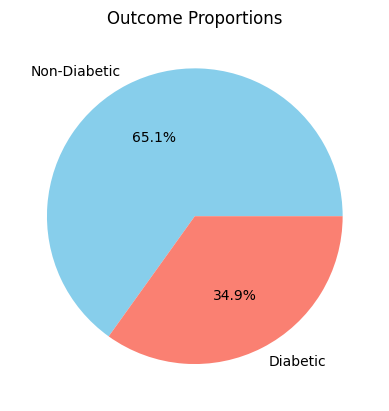

In [9]:
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Diabetic', 'Diabetic'], colors=['skyblue', 'salmon'])
plt.title("Outcome Proportions")
plt.ylabel("")
plt.show()

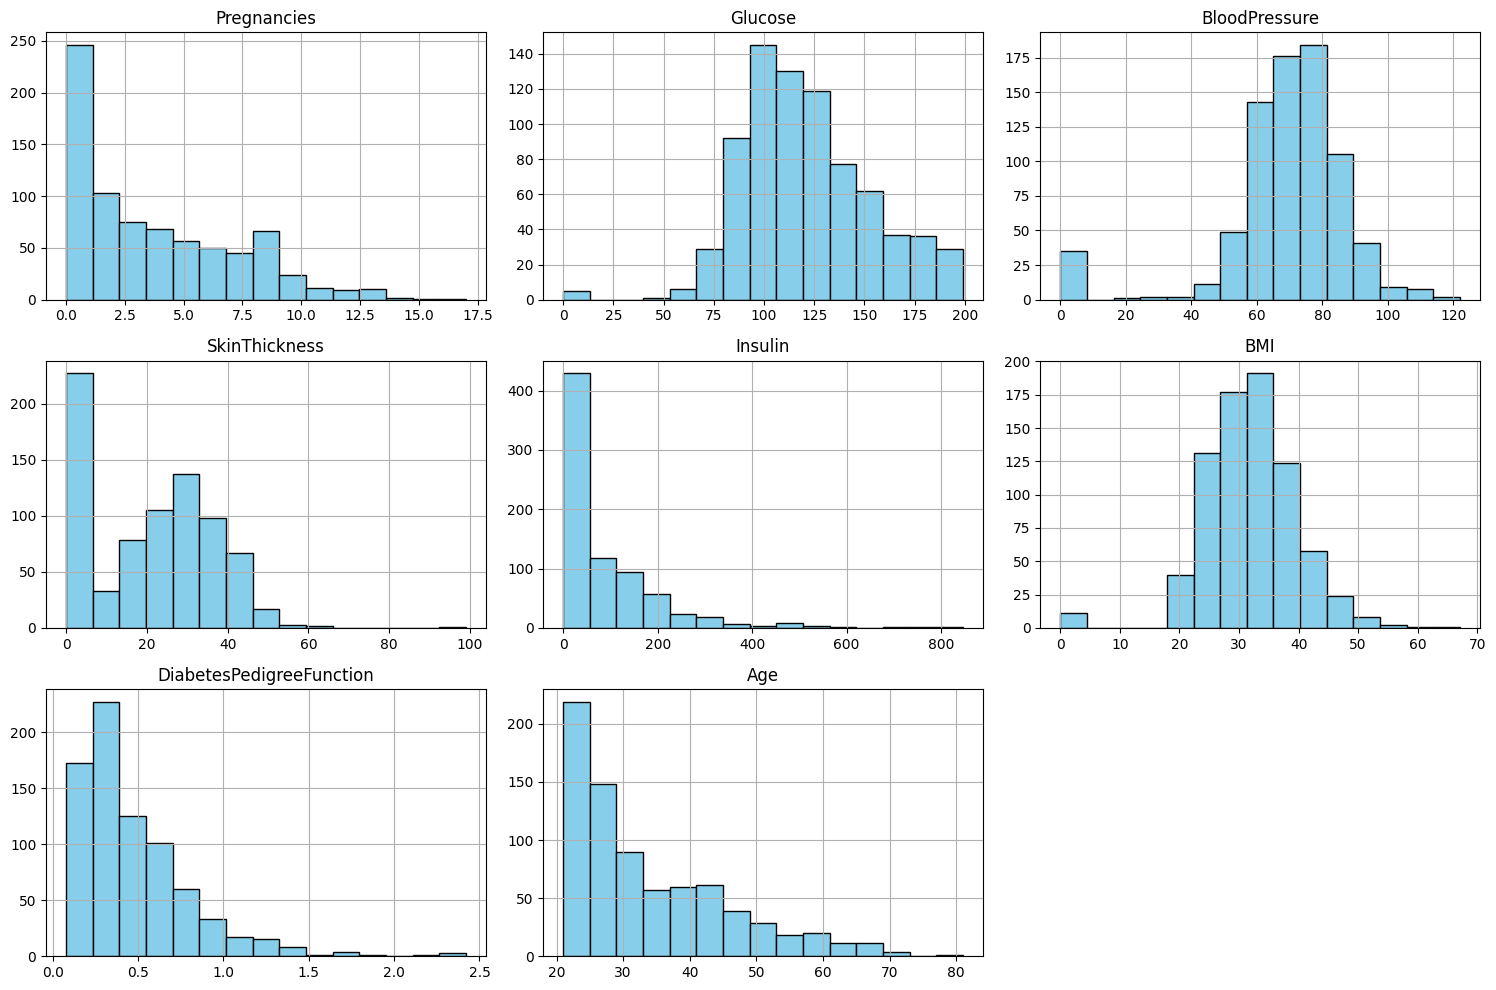

In [10]:
num_cols = df.drop(columns='Outcome').columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


In [12]:
num_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

C:\Users\anjan\AppData\Local\Temp\ipykernel_17652\1798817100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='Set2')
C:\Users\anjan\AppData\Local\Temp\ipykernel_17652\1798817100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='Set2')
C:\Users\anjan\AppData\Local\Temp\ipykernel_17652\1798817100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='Set2')
C:\Users\anjan\AppData\Local\Temp\ipykernel_17652\1798817100.py:4: Future

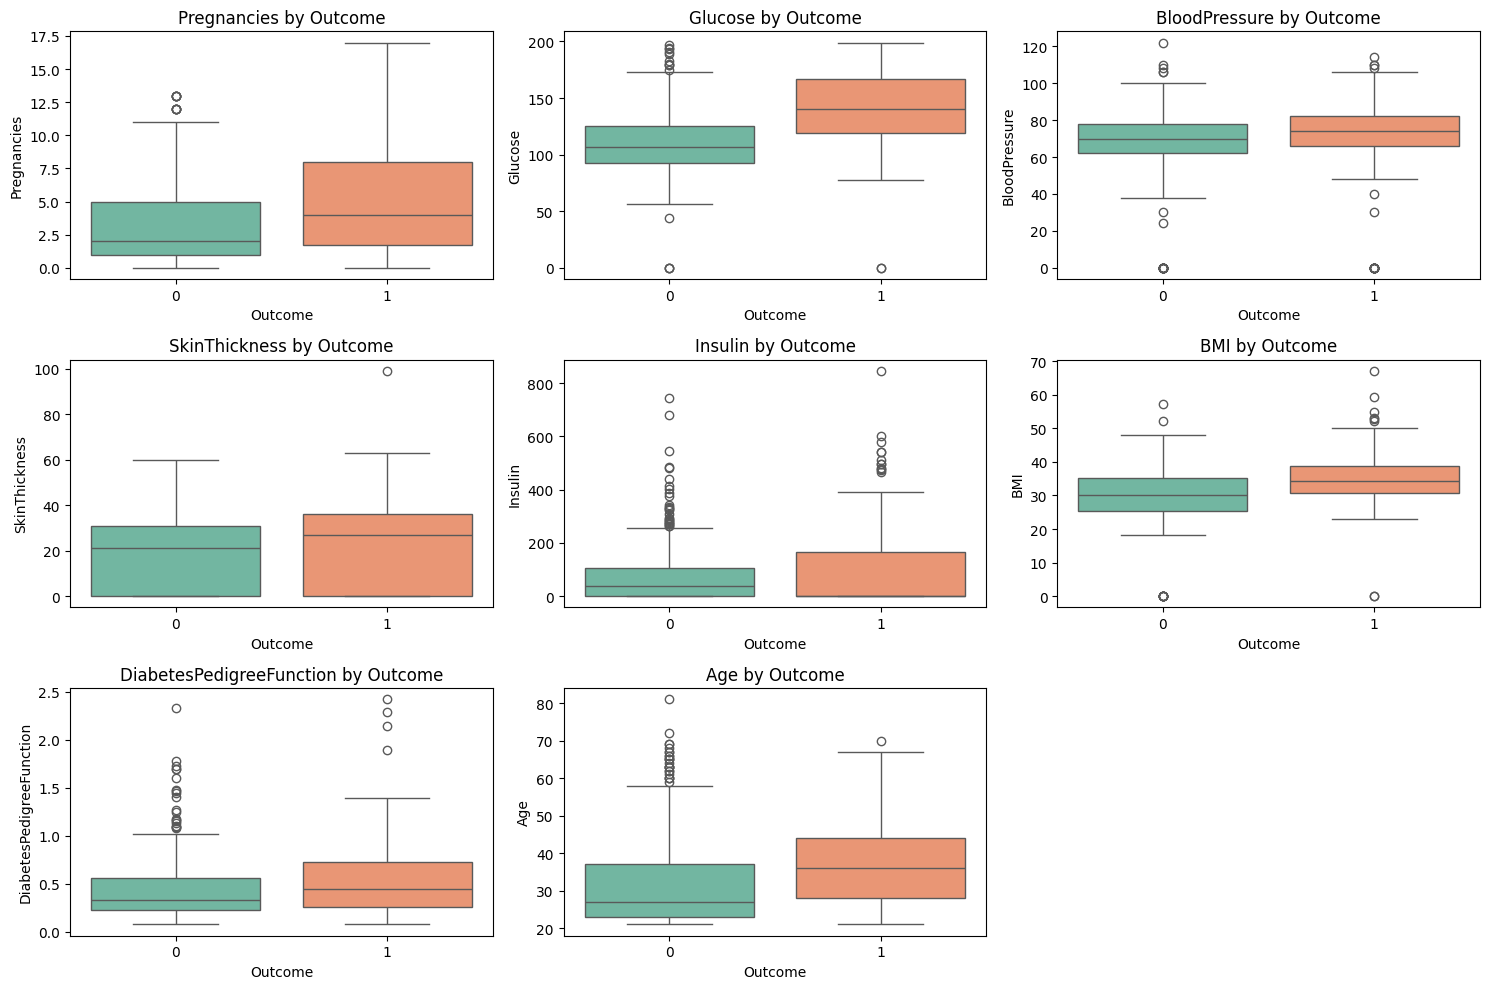

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Outcome', y=col, palette='Set2')
    plt.title(f"{col} by Outcome")
plt.tight_layout()
plt.show()


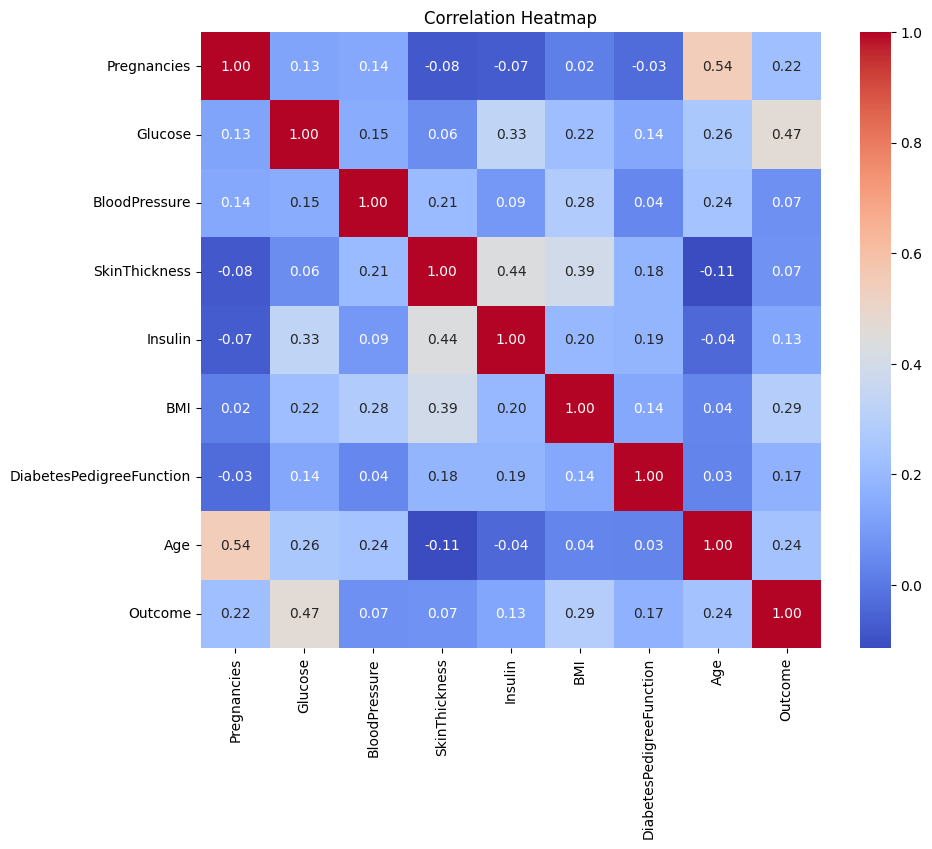

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original class distribution:", Counter(y_train))


Original class distribution: Counter({0: 401, 1: 213})


In [ ]:
# Using SMOTE as class 1 is underrepresented
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 400, 1: 400})


c:\Users\anjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
# To reduce majority class
# under = RandomUnderSampler(random_state=42)
# X_train_under, y_train_under = under.fit_resample(X_train, y_train)
# print("After undersampling:", Counter(y_train_under))


Model name is  KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.7272727272727273
****************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76        99
           1       0.59      0.80      0.68        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.73       154

****************************************************************************************************
Confusion Matrix and plot
[[68 31]
 [11 44]]


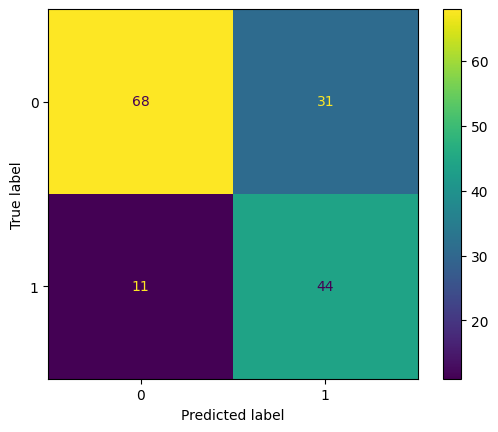

Model name is  GaussianNB()
Accuracy: 0.7597402597402597
****************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154

****************************************************************************************************
Confusion Matrix and plot
[[73 26]
 [11 44]]


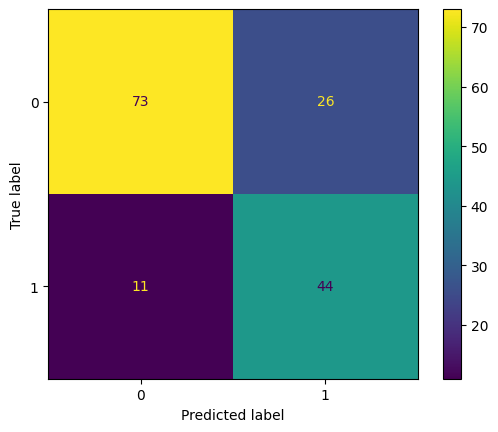

Model name is  SVC()
Accuracy: 0.7402597402597403
****************************************************************************************************

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

****************************************************************************************************
Confusion Matrix and plot
[[74 25]
 [15 40]]


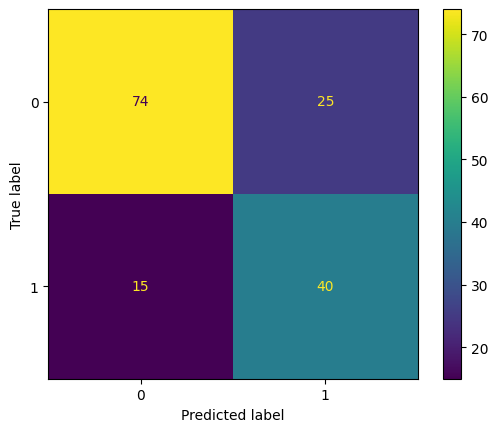

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

knn=KNeighborsClassifier(n_neighbors=7)
nvb=GaussianNB()
sm=SVC()
lst=[knn,nvb,sm]

for i in lst:
    print("Model name is ",i)
    i.fit(X_train_smote,y_train_smote)
    y_pred=i.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("*"*100)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))  
    print("*"*100)
    print("Confusion Matrix and plot")
    cm=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(cm)
    print(cm)
    cmd.plot()
    plt.show()


